_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión

_Nombre del estudiante: Araceli Ruiz Vallecillo_

## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los regresores.
- Investigar la aplicación de los modelos de regresión a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos el dataset separando las columnas por ';', poniendo los valores decimales con ',' y cambiando los valores '-200' por NaN
filename = "AirQualityUCI.csv"
df = pd.read_csv(
    filename,
    delimiter=";",
    usecols=["Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"],
    encoding="utf-8",
    low_memory=False,
    encoding_errors="replace",
    decimal=",",
    na_values=-200
)

#### ¿Cuántas instancias tiene el dataset?

In [3]:
#Calculamos el numero de filas que tiene el dataset
print("El numero de instancias (filas) del dataset es: ",df.shape[0])

El numero de instancias (filas) del dataset es:  9471


_indica aquí tu respuesta_

El dataset posee 9471 instancias. Para su cáculo se ha utilizado la función `shape[0]` , que nos indica el número de filas del dataset. 

#### ¿Cuál es el tipo de datos de cada una de las columnas? ####

In [4]:
#Imprimimos los tipos de cada columna
print(df.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


_indica aquí tu respuesta_

Utilizando la función `dtypes` podemos ver que tenemos 15 columnas distintas y cada una con su tipo de datos. Cabe destacar las columnas `Date` y `Time` que ambas son de tipo `object`, mientras que el resto son de tipo `float64`.

#### ¿Cuántas columnas categóricas hay? ¿y cuántas continuas?

In [5]:
#En primer lugar vamos a convertir la variable "Date" a tipo datetime para su mejor manejo
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#Por otro lado, obtenemos las horas de la columna Time, ya que no hay minutos y segundos
time = df['Time'].map(lambda x: int(str(x).split('.')[0]) if pd.notnull(x) else None).astype('Int64')

#Le asignamos a la columna Time el tiempo como categorico ya que solo hay 24 horas
df['Time'] = pd.Categorical(time)

#Mostramos de nuevo el tipo de datos despues de la conversión
print(df.dtypes)

Date             datetime64[ns]
Time                   category
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


_indica aquí tu respuesta_

Al observar las dos primeras variables `Date` y `Time`, que a priori eran ambas de tipo `object`, se ha podido ver como la primera de ellas (`Date`) en realidad tiene un comportamiento de tipo continuo por lo que no podría ser considerada como una variable categórica. Por este motivo, con la ayuda de la función `to_datetime`, se ha tranformado el tipo de esta columna para su mejor procesamiento.

Por otro lado, para el caso del tiempo, si se observan los valores, se puede ver como carecen de valor en los minutos y segundos, quedando por tanto 24 horas posibles, lo que podríamos considerar como 24 categorías posibles. Para ello en el código, se ha separado los valores de horas, minutos y segundos con ayuda de la función `split`, donde nos hemos quedado solo con el valor de las horas. Una vez que se tenía la columna tranformada en la variable `time`, se ha transformado en categórica y se ha asignado a las columna `Time`.

Una vez hechas las transformaciones pertinentes, se ha utilizado la función `dtypes` para ver los tipos de cada columna, pudiendo ver que el resto de variables son de tipo `float64`. Por tanto se puede resumir en que la única columna categórica es `Time` (1 variable categórica), siendo el resto continuas (14 variables continuas).

#### ¿Existen valores nulos en el dataset?

In [6]:
#Calculamos el numero de valores nulos del dataset total
print("El número de valores nulos en el dataset es: ", df.isnull().sum().sum())

#Numero de filas vacias 
filas_vacias = df.isnull().all(axis=1).sum()
print("El número de filas vacías completas es: ", filas_vacias)

#Valores nulos del dataset por columnas
print("El número de valores nulos por columnas es: ")
df.isnull().sum()

El número de valores nulos en el dataset es:  18411
El número de filas vacías completas es:  114
El número de valores nulos por columnas es: 


Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

_indica aquí tu respuesta_

Podemos observar que existen `18411 valores nulos totales` en el dataset, además de `114 filas vacías` completas en el mismo. Por otra parte, se puede ver como en otras variables existen además una mayor cantidad de valores nulos, entre las que destaca `NMHC(GT)` que cuenta con 8557 filas nulas de 9471 filas totales, siendo un `90,35% de valores nulos`, por tanto se podría eliminar dicha fila debido a ese alto porcentaje, por lo que no aportará mucha información.

In [7]:
#Eliminamos las filas que tengan en todas sus columnas NaN
df.dropna(how='all', inplace=True)

#Eliminamos la columna que anteriormente se vio que poseia un 90.3% de valores nulos
df.drop(columns=["NMHC(GT)"], inplace=True)

#Observamos de nuevo el numero de valores nulos por cada columna

#Numero de filas totales en el dataset
print("El nuevo número de instancias (filas) del dataset es: ",df.shape[0])

#Calculamos el numero de valores nulos del dataset total
print("El número de valores nulos en el dataset es: ", df.isnull().sum().sum())

#Numero de filas vacias 
filas_vacias = df.isnull().all(axis=1).sum()
print("El número de filas vacías completas es: ", filas_vacias)

#Valores nulos del dataset por columnas
print("El número de valores nulos por columnas es: ")
df.isnull().sum()

El nuevo número de instancias (filas) del dataset es:  9357
El número de valores nulos en el dataset es:  8258
El número de filas vacías completas es:  0
El número de valores nulos por columnas es: 


Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

#### ¿cuál es la variable respuesta?¿de qué tipo es?

_indica aquí tu respuesta_

Como variable respuesta continua he decidido utilizar `C6H6(GT)`, también conocido como 'benceno', es un compuesto importante de medir debido a su toxicidad y sus efectos negativos para la salud humana. Además, es la variable objeto de estudio del paper en el que se basa este dataset. Además, como se vió en las preguntas anteriores esta variable es de tipo `float64`, siendo por tanto numérica continua.

#### Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

In [8]:
# Estadísticas descriptivas para las variables CO, NOx, NO2
print("Los estadisticos de las variables CO(GT), NOx(GT), NO2(GT) es: ")
df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()

Los estadisticos de las variables CO(GT), NOx(GT), NO2(GT) es: 


,CO(GT),NOx(GT),NO2(GT)
count,7674.000000,7718.000000,7715.000000
mean,2.152750,246.896735,113.091251
std,1.453252,212.979168,48.370108
min,0.100000,2.000000,2.000000
25%,1.100000,98.000000,78.000000
50%,1.800000,180.000000,109.000000
75%,2.900000,326.000000,142.000000
max,11.900000,1479.000000,340.000000


_indica aquí tu respuesta_

De acuerdo con los resultados obtenidos utilizando la función `describe()`:

- `CO(GT)`: Tiene una **distribución ligeramente sesgada a la derecha**, que se puede comprobar dado a que su media *(mean)* es ligeramente mayor que la mediana *(cuartil 50%)*. Además, su valor máximo es considerablemente mayor que los cuartiles superiores, indicando la presencia de valores atípicos. 

- `NOx(GT)`: Presenta una **distribución altamente sesgada a la derecha**, con valores muy dispersos debido a su alta desviación estándar *(std)*. De la misma forma que para el compuesto anterior (CO(GT)), existe una gran diferencia entre el valor maximo y sus cuartiles superiores, lo que indica la presencia de valores atípicos.

- `NO2`: Tiene una **distribución más simétrica** en comparación con las otras variables. Sin embargo, muestra cierta dispersión dado su desviación estándar y los valores atípicos no se muestran tan prominentes como en los dos casos anteriores.

Además, también cabe destacar que para estas tres variables presentan una **gran diferencia entre sus rangos**. Esto podría influir de forma negativa a la hora de trabajar con modelo y realizar una regresión lineal, por lo que sería recomendable realizar una normalización en la etapa de preprocesamiento del dataset.

#### ¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

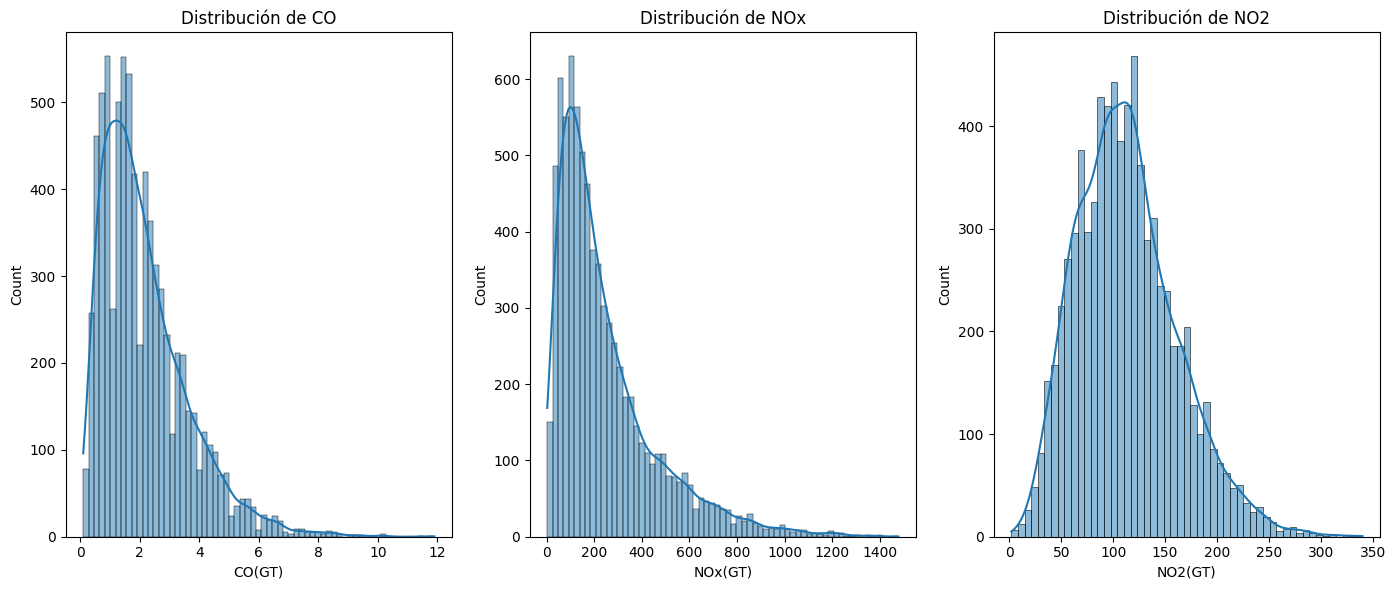

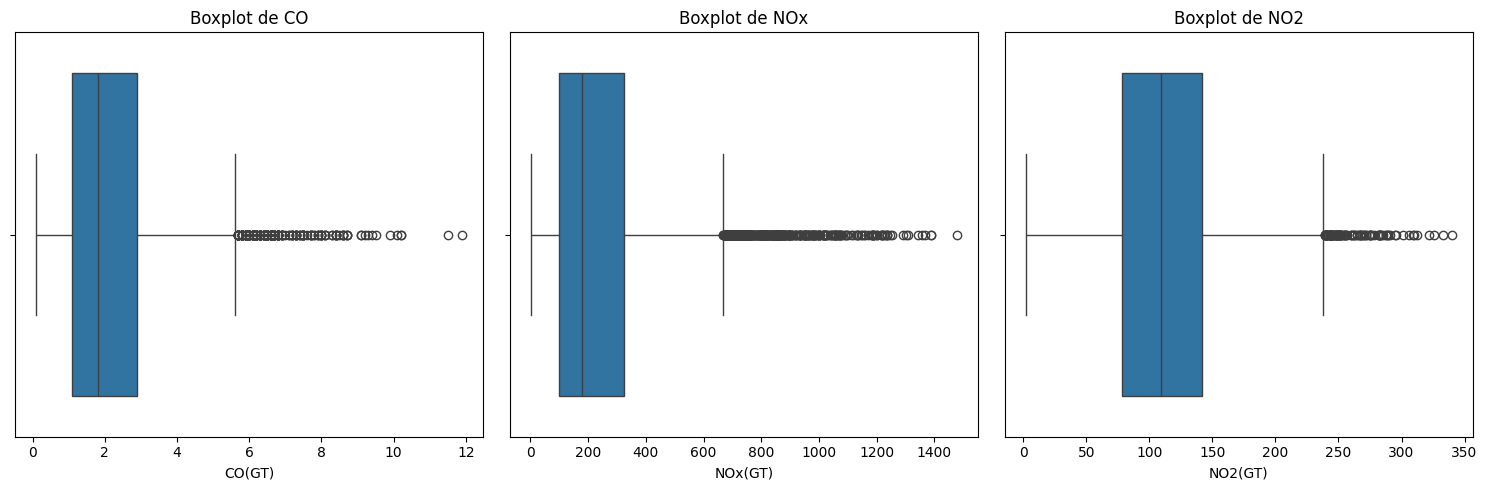

In [9]:

#Mostramos los diagramas de cada variable para ver su distribución
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Histograma para CO
sns.histplot(data=df['CO(GT)'], kde=True, ax=ax[0])
ax[0].set_title('Distribución de CO')

# Histograma para NOx
sns.histplot(data=df['NOx(GT)'], kde=True, ax=ax[1])
ax[1].set_title('Distribución de NOx')

# Histograma para NO2
sns.histplot(data=df['NO2(GT)'], kde=True, ax=ax[2])
ax[2].set_title('Distribución de NO2')

# Ajustamos el espacio entre subplots
plt.tight_layout()
plt.show()


#Creación de diagramas de cajas para la deteccion de valores atípicos

fig, ax= plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df['CO(GT)'], ax=ax[0], orient='h')
ax[0].set_title('Boxplot de CO')

sns.boxplot(data=df['NOx(GT)'], ax=ax[1], orient='h')
ax[1].set_title('Boxplot de NOx')

sns.boxplot(data=df['NO2(GT)'], ax=ax[2], orient='h')
ax[2].set_title('Boxplot de NO2')

# Ajustamos el espacio entre subplots
plt.tight_layout()
plt.show()

_indica aquí tu respuesta_

Para poder ver las distribuciones de las tres variables, así como sus posibles valores atípicos, se ha utilizado **histogramas** y **diagramas de caja**: 

Como ya se comentó en la pregunta anterior, tanto `CO(GT)` como `NOx(GT)` muestran una **distribución sesgada a la derecha**, mientras `NO2(GT)` muestra una **distribución más simétrica** en comparación con las dos anteriores.

Por parte de los **datos faltantes**, en cuanto a `CO(GT)` se puede ver como en el histograma se muestra en ciertos puntos un **cambio brusco en cuanto a la frecuencia**, indicando así los puntos en los que hay más **datos faltantes**. A continuación profundizaremos más en esta parte.

En cuanto a los **datos anómalos**, se pueden observar como en los diagramas de caja los valores anómalos se agrupan a la derecha. Además se observa como `NOx(GT)` posee una concentración mayor de valores anómalos. Más adelante, profundizaremos más sobre este tema.

In [10]:
#Valores nulos del dataset por columnas
print("El número de valores nulos por columnas es: ")
print(df.isnull().sum())

# Número de filas que contienen algún dato faltante
print(f"\n{df.shape[0] - df.dropna().shape[0]} filas de {df.shape[0]} filas contienen algún dato faltante")
print(f"\nEl {round(((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100,2)} % del dataset contiene algún dato faltante.")

El número de valores nulos por columnas es: 
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

2416 filas de 9357 filas contienen algún dato faltante

El 25.82 % del dataset contiene algún dato faltante.


En cuanto a los **datos faltantes**, depués de la eliminación de las filas vacías (114) y al realizar de nuevo la suma de valores nulos por columa, se puede observar como `CO(GT) posee 1683`, `NOx(GT) posee 1639` y `NO2(GT) posee 1642 datos faltantes`. Por ello, durante la fase de preprocesamiento sería conveniente abordar estos valores mediante **métodos de imputación** de dichos valores, ya sea por eliminación, la media, mediana, moda o por vecinos. Sin embargo, al tener un tanto por ciento considerable de datos faltantes, sería aconsejable no utilizar la técnica de eliminación.

In [13]:
# Calculamos los datos anómalos y el número de filas que contienen algún dato anómalo
outliers_info = []

# Creamos un conjunto para almacenar los índices de filas con datos anómalos para poder borrarlos luego con más facilidad
filas_con_outliers = set()

for c in df.columns:
    if df[c].dtype in ['float64', 'int64', 'datetime64[ns]']:  # Consideramos solo las columnas numéricas
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_in_column = (df[c] < lower_bound) | (df[c] > upper_bound)

        outliers_info.append([c, outliers_in_column.sum()])
        filas_con_outliers.update(df.index[outliers_in_column])

# Creamos un DataFrame con la información de los datos anómalos
outliers = pd.DataFrame(outliers_info, columns=["Variable", "Datos anómalos"])

# Contamos las filas con al menos un dato anómalo
total_filas_outliers = len(filas_con_outliers)

# Mostramos los resultados
print(outliers)
print(f"\n{total_filas_outliers} filas de {df.shape[0]} filas contienen algún dato anómalo.")
print(f"\nEl {round((total_filas_outliers/df.shape[0])*100,2)} % del dataset son datos anómalos.")


         Variable  Datos anómalos
0            Date               0
1          CO(GT)             215
2     PT08.S1(CO)             118
3        C6H6(GT)             228
4   PT08.S2(NMHC)              65
5         NOx(GT)             435
6    PT08.S3(NOx)             241
7         NO2(GT)             107
8    PT08.S4(NO2)              97
9     PT08.S5(O3)              93
10              T               3
11             RH               0
12             AH               2

899 filas de 9357 filas contienen algún dato anómalo.

El 9.61 % del dataset son datos anómalos.


A través del cálculo del **rango intercuartílico (IQR)** y de los datos que se quedan fuera del rango del diagrama de caja se han podido calcular el número de **datos anómalos (outliers)**. Este rango se encuentra definido por **1.5 veces el IQR, por encima de Q3 y por debajo de Q1**. El cáculo de dichos valores es extremadamente importante, ya que podrían afectar de forma negativa al rendimiento del modelo. Al igual que con los datos ausentes, se tratarán de procesar estos datos anómalos en la fase de preprocesamiento. En este caso, al *contrario de los datos ausentes*, si se podría utilizar la **eliminación de filas de los datos anómalos**, dado que solo suponen un *9,61% del dataset global*.

In [14]:
#Preprocesamiento del dataset de los datos ausentes por técnicas de imputación y de los datos anómalos o outliers por eliminación

# Creamos un DataFrame sin los outliers (eliminacion de outliers)
df_sin_outliers = df.drop(index=filas_con_outliers)

# Mostramos la información sobre el nuevo DataFrame
print(f"El DataFrame original tenía {df.shape[0]} filas.")
print(f"El DataFrame sin outliers tiene {df_sin_outliers.shape[0]} filas.")


El DataFrame original tenía 9357 filas.
El DataFrame sin outliers tiene 8458 filas.


In [ ]:
#Rellenamos los valores nulos con tecnicas de imputación, en este caso con los vecinos (KNN)
df_sin_outliers.ffill(inplace=True)

Para finalizar este apartado se ha hecho un breve preprocesamiento donde:
- Se han **eliminado los outliers**, es un paso muy importante a realizar antes de la correlación dado que los outliers pueden distorsionar significativamente las medidas de correlación, ya que la correlación de Pearson es sensible a valores extremos.

- Por ultimo, se han **imputado las variables numéricas por los vecinos (KNN)** ya que proporciona unos mejores resultados en cuanto a la distribución de las datos que las demás. Además, es aplicable tanto para variables numéricas como categóricas, por lo que no habría que hacer distinciones, ya que si se quisiera aplicar la imputación por la mediana, esta no se podría aplicar a las variables categóricas, por lo que se tendría que usar para esta última la imputación por la moda.

#### ¿Cómo son las correlaciones entre las variables del dataset?

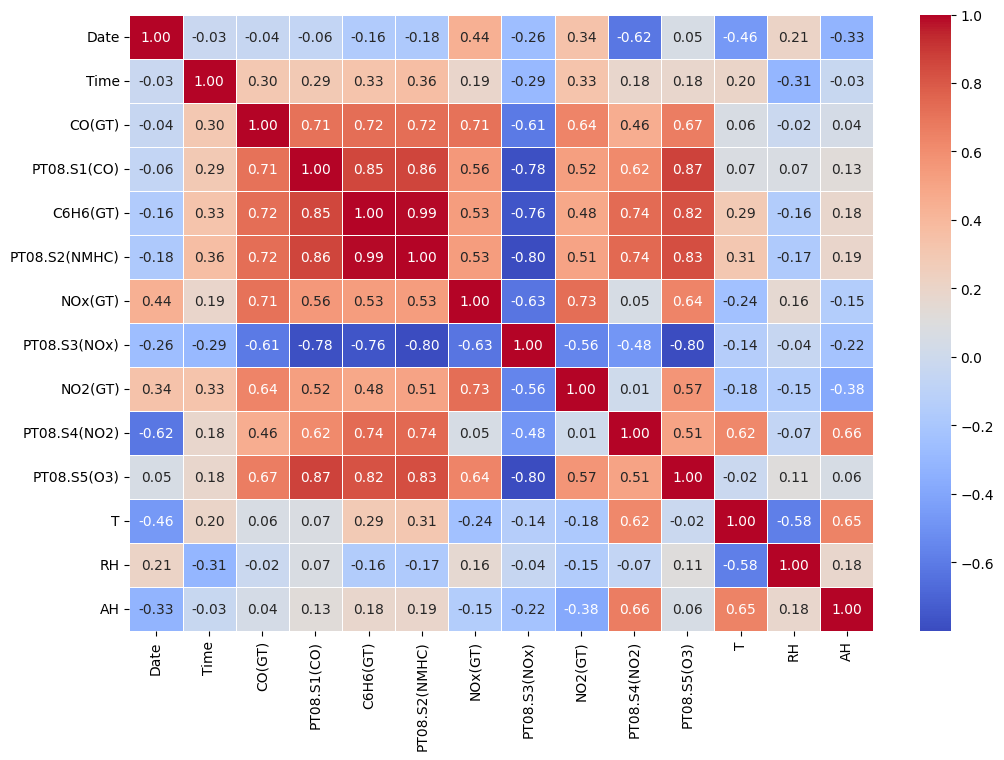

In [18]:
#Calculamos la matriz de correlación según el metodo de pearson
matriz_correlacion = df_sin_outliers.corr(method='pearson')
#print(f"La matriz de correlación usando el método de pearson es: {matriz_correlacion}")

#Dibujamos un mapa de calor para ver de forma más gráfica las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

_indica aquí tu respuesta_

En este apartado se muestra el **mapa de calor de la matriz de correlación** según el **método de pearson** de cada una de las variables. 

Al analizar el mapa de calor sobre la matriz de correlación del dataset, se observan como algunas variables poseen una relación extremadamente fuerte. En este caso destacan `C6H6(GT)` y `PT08.S2(NMHC)` con una correlación positiva de **0.99**. Esto indica que este sensor puede servir como una muy buena variable predictora para `C6H6(GT)`.

Por otro lado, también hay que destacar la variable `PT08.S3(NOx)` que muestra una correlación negativa con todas las variables del dataset. 

En general las variables de los compuestos químicos y sus sensores son las que poseen correlaciones más fuertes entre sí que con el resto de variables *(Date, Time, T, RH, AH)*.


#### ¿Qué tres variables son las más correlacionadas con la variable objetivo?

In [19]:
# Extraemos la correlación de todas las variables con la variable objetivo "C6H6(GT)"
correlacion_objetivo = matriz_correlacion["C6H6(GT)"].drop("C6H6(GT)")

print("Las 3 variables más correlacionadas con C6H6(GT) son:")
print(correlacion_objetivo.abs().sort_values(ascending=False).head(3))

Las 3 variables más correlacionadas con C6H6(GT) son:
PT08.S2(NMHC)    0.988255
PT08.S1(CO)      0.852825
PT08.S5(O3)      0.822773
Name: C6H6(GT), dtype: float64


_indica aquí tu respuesta_

Al examinar la matriz de correlación, se han seleccionado las variables con los valores más altos en terminos absolutos de correlación con la variable objetivo C6H6(GT):

- La alta correlación entre **C6H6 (benceno) y el sensor de NMHC** es esperada y refleja que el benceno es un componente principal dentro de los hidrocarburos no metánicos. Esto también sugiere que las fuentes de emisión de NMHC, como el tráfico de los vehículos, están contribuyendo significativamente a la presencia de benceno en la atmósfera.

- La correlación de 0.85 sugiere que tanto el **sensor de CO como el C6H6 (benceno)** provienen de las mismas fuentes, principalmente de vehículos y procesos de combustión. Esto refuerza más la idea de que ambos compuestos son indicadores de contaminación generada por la actividad humana y de su coexistión en la atmósfera.

- Aunque el **compuesto O3 que mide el sensor y C6H6 (benceno)** no están directamente relacionados en términos de estructura química, ambos son contaminantes del aire que suelen estar presentes en áreas urbanas con alta actividad de tráficos de vehículos o industrial. La alta correlación entre ellos sugiere que ambos son indicadores de contaminación urbana. Por lo tanto esto es un indicador de que ambos se producen de manera simultanea a partir de las mismas fuentes de contaminación.

Por tanto estas tres variables de sensores pueden ser útiles a la hora de realizar la regresión.

#### ¿Existe alguna variable que no tenga correlación?

In [20]:
#Calculo de las variables que no tinen correlacion con la variable objetivo
variables_sin_correlacion = correlacion_objetivo[correlacion_objetivo.abs() < 0.1].sort_values()

# Comprobar si el resultado está vacío
if not variables_sin_correlacion.empty:
    print(f"Las variables que no tienen correlación significativa con C6H6(GT) son:")
    print(variables_sin_correlacion)
else:
    print("No hay variables sin correlación con C6H6(GT).")


No hay variables sin correlación con C6H6(GT).


In [21]:
print("Variables ordenadas por su correlación en valor absoluto con C6H6(GT):")
print(correlacion_objetivo.abs().sort_values())

Variables ordenadas por su correlación en valor absoluto con C6H6(GT):
RH               0.156577
Date             0.161886
AH               0.177765
T                0.286376
Time             0.330538
NO2(GT)          0.483962
NOx(GT)          0.529519
CO(GT)           0.721898
PT08.S4(NO2)     0.736123
PT08.S3(NOx)     0.761883
PT08.S5(O3)      0.822773
PT08.S1(CO)      0.852825
PT08.S2(NMHC)    0.988255
Name: C6H6(GT), dtype: float64


_indica aquí tu respuesta_

Como se puede observar en las ejecuciones, no hay ninguna variable como tal que tenga correlación cercana a cero (menor que 0.1) con `C6H6`, sin embargo, si observamos la lista ordenada de correlaciones podemos ver como las variables que menos correlación muestran con la variable objetivo son **Date, Time, T, RH y AH**, por lo que se podría deducir que no son altamente significativas para predecir la variable `C6H6`, por lo que se podría prescindir de ellas a la hora realizar la regresión y predicción ya que no aportan información significativa.

#### En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

_indica aquí tu respuesta_

El análisis exploratorio de datos (EDA) ha permitido identificar aspectos clave para el desarrollo del modelo predictivo. Se observó que las variables `Time` y `Date` requerían transformaciones específicas: la primera se convirtió en categórica debido a sus 24 valores únicos, mientras que la segunda se trató como variable continua, ya que su naturaleza no justificaba un enfoque categórico. Además, se eliminaron las filas con datos vacíos y la columna `NMHC(GT)` por su alto porcentaje de valores nulos. Posteriormente, se analizaron las distribuciones de `CO(GT)`, `NOx(GT)` y `NO2(GT)`, mostrando sesgos a la derecha, excepto la última, que presentó una distribución más simétrica. En función de las distribuciones observadas se aconsejaría realizar una normalización para asegurar que todas las variables tengan un impacto equilibrado en el modelo a la hora de aplicar la regresión. Por otro lado, los valores atípicos se gestionaron mediante el método del **rango intercuartílico (IQR)** y los valores faltantes se imputaron utilizando **técnicas basadas en vecinos cercanos** *(KNN)*.

La matriz de correlación reveló que las variables más relevantes para la variable objetivo son `PT08.S2(NMHC)`, `PT08.S1(CO)` y `PT08.S5(O3)`, mientras que otras como `Date`, `Time`, `T`, `RH` y `AH` mostraron correlaciones débiles y podrían tener menor impacto en el modelo. Por tanto, estas observaciones sugieren que el enfoque predictivo debería centrarse en las variables más significativas. 

En resumen, el EDA ha proporcionado una base sólida para desarrollar un modelo robusto, con datos limpios, variables clave identificadas y estrategias definidas para manejar las particularidades de cada variable.


In [26]:
#Como se ha comentado en el EDA, nos vamos a centrar en las variables mas significativas para el modelo
#Por tanto se va a proceder a eliminar las variables que no tienen correlación significativa con la variable objetivo

columnas_significativas = correlacion_objetivo[correlacion_objetivo.abs() > 0.330538].index

# Añadimos la columna 'C6H6(GT)' a las columnas significativas eliminada antes por la correlacion
columnas_significativas = columnas_significativas.append(pd.Index(['C6H6(GT)']))

# Creamos un nuevo DataFrame con solo las columnas seleccionadas
df_filtrado = df_sin_outliers[columnas_significativas]

print("Las columnas restantes tras filtrar por la correlación significativa son:")
print(df_filtrado.columns)

print("\nEl número de columnas restantes tras filtrar por la correlación significativa son:")
print(df_filtrado.shape[1])

Las columnas restantes tras filtrar por la correlación significativa son:
Index(['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)'],
      dtype='object')

El número de columnas restantes tras filtrar por la correlación significativa son:
9


### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [27]:
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

#### Separar datos de entrenamiento y test

In [28]:
# Dividimos el dataset en variables predictoras y variable objetivo
X = df_filtrado[["PT08.S2(NMHC)"]]  #Nos quedamos con la variable mas correlacionada para hacer la regresion simple
y = df_filtrado["C6H6(GT)"]  # Variable objetivo (dependiente)

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

En base al EDA realizado, la variable que posee una mejor correlación con `C6H6` sería `PT08.S2(NMHC)`, por lo que se cogerá dicha variable para realizar la predicción.

#### Entrena el modelo con los datos de entrenamiento

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### ¿Cuáles son los valores aprendidos por el modelo para los parámetros?

In [30]:
#Calculo de los coeficientes de la regresión
coeficientes = lm.coef_
print(DataFrame({
    'Variable': X.columns,
    'Coeficiente': coeficientes
}))

#Calculo del intercepto de la regresión
intercepto = lm.intercept_
print("\nEl intercepto de la regresión es: ", intercepto)

        Variable  Coeficiente
0  PT08.S2(NMHC)     5.864439

El intercepto de la regresión es:  9.194413242684009


#### Explica qué indican estos parámetros

_indica aquí tu respuesta_

Los valores obtenidos por el modelo se corresponden a los **coeficientes de la regresión lineal**. Cada coeficiente refleja cuánto cambiará la variable dependiente u objetivo (`C6H6(GT)`) cuando una de las variables independientes (o características predictoras) varíe en una unidad, manteniendo constantes las demás variables. Estos coeficientes nos permiten entender cómo se relacionan las variables predictoras con la variable objetivo.

En este caso en concreto, dado que se trata de una regresión lineal simple con solo una variable predictora, `PT08.S2(NMHC)`, el coeficiente calculado es de 5.864439. Esto significa que un aumento de una unidad en `PT08.S2(NMHC)` resultará en un incremento de 5.864439 unidades en la variable objetivo, `C6H6(GT)`. Además, este alto valor indica que la variable predictora tiene una fuerte influencia sobre la variable objetivo.

Por otro lado, el **intercepto de la regresión lineal** indica el valor de la variable objetivo cuando todas las variables predictoras son cero (valor constante). El intercepto calculado por el modelo es 9.194413242684009. Este valor ajusta la predicción de la regresión para asegurar que sea lo más precisa posible, incluso cuando las variables predictoras no tienen influencia (cuando su valor es cero).

#### Realiza las predicciones para el conjunto de datos de test

In [31]:
predicciones = lm.predict(X_test)

# Mostrar las predicciones
print("Las predicciones para el conjunto de test son: ")
df_predicciones = DataFrame(predicciones, columns=["Predicciones"])
print(df_predicciones)

Las predicciones para el conjunto de test son: 
      Predicciones
0        10.373345
1        12.600163
2         6.741510
3        17.159838
4         1.121445
...            ...
1687      0.776819
1688     13.581023
1689     11.407225
1690     18.114189
1691     17.583994

[1692 rows x 1 columns]


#### Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

#Definimos una función para calcular las métricas de evaluación
def calculo_metricas(y_test, y_predicciones, conjunto):
    # Suprimimos los warnings específicos
    warnings.filterwarnings('ignore', category=RuntimeWarning)

    # Calcular MSE
    mse = mean_squared_error(y_test, y_predicciones)
    print("MSE (", conjunto,"): ", mse)

    # Calcular RMSE
    rmse = np.sqrt(mse)
    print("RMSE(", conjunto,"): ", rmse)

    # Calcular MAE
    mae = mean_absolute_error(y_test, y_predicciones)
    print("MAE(", conjunto,"): ", mae)

    # Calcular R²
    r2 = r2_score(y_test, y_predicciones)
    print("R²(", conjunto,"): ", r2)

    # Calcular RMLSE
    rmlse = np.sqrt(np.mean(np.log1p(y_test) - np.log1p(y_predicciones))**2)
    print("RMLSE(", conjunto,"): ", rmlse)

    # Calcular MAPE
    mape = np.mean(np.abs((y_test - y_predicciones) / y_test)) * 100
    print("MAPE(", conjunto,"): ", mape, "%")

    # Calcular MPE
    mpe = np.mean((y_test - y_predicciones) / y_test) * 100
    print("MPE(", conjunto,"): ", mpe, "%")

    # Volver a habilitar los warnings si es necesario
    warnings.filterwarnings('default', category=RuntimeWarning)


print("Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal simple para el conjunto de Test: \n")
calculo_metricas(y_test, predicciones, "Test regresión lineal simple")


Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal simple para el conjunto de Test: 

MSE ( Test regresión lineal simple ):  0.8076986698019254
RMSE( Test regresión lineal simple ):  0.898720573816982
MAE( Test regresión lineal simple ):  0.7125248854554282
R²( Test regresión lineal simple ):  0.9753783155225848
RMLSE( Test regresión lineal simple ):  0.056231954867063935
MAPE( Test regresión lineal simple ):  18.83335376699401 %
MPE( Test regresión lineal simple ):  10.784017380299838 %


_indica aquí tu respuesta_

`R²` es una de las mejores métricas para capturar de forma más general el rendimiento del modelo y su capacidad de ajuste. Sin embargo, es recomendable, tal y como se ha hecho, complementarlo con `RMSE` o `MAE` para obtener una imagen más completa de la precisión del modelo, especialmente si la magnitud de los errores es importante, así como de otras métricas para obtener más información.

El modelo muestra un rendimiento sólido según las métricas evaluadas. El `R²` de **0.9754** indica que el modelo explica el **97.54%** de la variabilidad de la variable objetivo, lo que sugiere un buen ajuste. Además, el `RMSE` de **0.8987** y el `MAE` de **0.7125** muestran que las predicciones son precisas, con un error promedio razonable. El `MSE` de **0.8077**, al ser el cuadrado de la diferencia entre las predicciones y los valores reales, refuerza estos resultados, aunque penaliza más los errores grandes. Sin embargo, el `MAPE` de **18.83%** sugiere que las predicciones se desvían en promedio en un 18.83% de los valores reales, lo cual es aceptable, pero aún se podría mejorar. El `RMLSE` de **0.0562** indica que el modelo maneja bien los valores pequeños, lo cual es positivo dada la posible distribución sesgada de los datos. Finalmente, el `MPE` positivo de **10.78%** revela que el modelo tiende a subestimar los valores reales, lo que podría ser mejorable. 

En resumen, el modelo tiene un buen rendimiento general, pero se podría optimizar para mejorar la exactitud de las predicciones y reducir la tendencia a subestimar los valores reales. Además, la visualización de cada una de las métricas nos proporciona una información más completa de como predice el modelo y su relación con los valores reales.

#### ¿Qué error tiene el modelo? Explícalo.

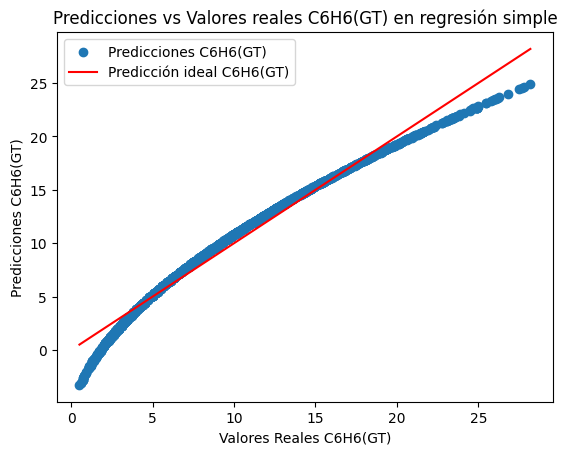

In [33]:
plt.scatter(y_test, predicciones, label="Predicciones C6H6(GT)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Predicción ideal C6H6(GT)")
plt.title("Predicciones vs Valores reales C6H6(GT) en regresión simple")
plt.xlabel('Valores Reales C6H6(GT)')
plt.ylabel('Predicciones C6H6(GT)')
plt.legend()

In [51]:
#Comprobaciones de que NO hay overfitting

# Predicciones en el conjunto de entrenamiento
predicciones_train = lm.predict(X_train)

print("Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal simple para el conjunto de Train: \n")
calculo_metricas(y_train, predicciones_train, "Train regresión lineal simple")

Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal simple para el conjunto de Train: 

MSE ( Train regresión lineal simple ):  0.8216560887856607
RMSE( Train regresión lineal simple ):  0.9064524746425819
MAE( Train regresión lineal simple ):  0.7126701951964808
R²( Train regresión lineal simple ):  0.9766663179162601
RMLSE( Train regresión lineal simple ):  0.045608213915293586
MAPE( Train regresión lineal simple ):  16.77559532717809 %
MPE( Train regresión lineal simple ):  8.256970744953536 %


_indica aquí tu respuesta_

El modelo presenta un error moderado, que se refleja en varias métricas de evaluación en el conjunto de Test. El `Error Cuadrático Medio (MSE)` y la `Raíz del Error Cuadrático Medio (RMSE)` muestran que las predicciones del modelo tienen un error promedio de aproximadamente 0.9 unidades, lo que indica una precisión razonable pero no perfecta. Además, el `Error Absoluto Medio (MAE)` también confirma que el error promedio es de 0.71 unidades.

Sin embargo, un aspecto relevante es que el modelo tiende a subestimar los valores reales, como lo muestra el `Error Porcentual Medio (MPE)` positivo de 10.78%. Esto significa que el modelo, en promedio, predice valores más bajos de los reales, lo cual podría ser un error sistemático que afecta su rendimiento.

También se observa un `Error Absoluto Porcentual Medio (MAPE)` de 18.83%, lo que indica que, en promedio, las predicciones se desvían un 18.83% de los valores reales. Aunque este porcentaje no es excesivamente alto, aún puede mejorarse, especialmente para casos donde la precisión es crucial.

Sin embargo, al observar la gráfica de dispersión, se aprecia que las predicciones siguen de manera muy similar la línea de predicción ideal. Esto sugiere que el modelo está generalizando bien y no presenta signos evidentes de overfitting, ya que las métricas obtenidas en el conjunto de prueba no muestran una desviación significativa respecto a las expectativas teóricas. Además se ha realizado la predicción con el conjunto de entrenamiento y se han calculado de nuevo las métricas, las cuales son bastante consistentes entre el conjunto de entrenamiento y el conjunto de prueba. Las pequeñas diferencias observadas (como un R² ligeramente más bajo en el conjunto de prueba o un MAPE y MPE más altos) son normales en la mayoría de los modelos y no indican un sobreajuste. Además, el modelo mantiene un buen rendimiento en ambos conjuntos.

En resumen, el error del modelo se caracteriza principalmente por una subestimación sistemática y una precisión relativa que podría optimizarse, aunque en general el rendimiento es bastante bueno.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [58]:
# Dividimos en datos de entrenamiento y test
X_multiple = df_filtrado.drop('C6H6(GT)', axis=1)
y_multiple = df_filtrado['C6H6(GT)']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Estandarizamos los datos
X_train_m = DataFrame(scaler.fit_transform(X_train_m), columns=X_train_m.columns)
X_test_m = DataFrame(scaler.fit_transform(X_test_m), columns=X_test_m.columns)

In [59]:
#Entrenamos el modelo con el dataset de entrenamiento
lm_multiple = LinearRegression()
lm_multiple.fit(X_train_m, y_train_m)

#Una vez entrenado calculamos los coeficientes de la regresión y el intercepto
coeficientes_reg_multiple = lm_multiple.coef_
print(DataFrame({
    'Variable': X_multiple.columns,
    'Coeficiente': coeficientes_reg_multiple
}))

intercepto_reg_multiple = lm_multiple.intercept_
print("\nEl intercepto de la regresión es: ", intercepto_reg_multiple)

#Realizamos las predicciones con el dataset de test
predicciones_reg_multiple = lm_multiple.predict(X_test_m)

# Mostrar las predicciones
print("\nLas predicciones para el conjunto de Test son: ")
df_predicciones_multiple = DataFrame(predicciones_reg_multiple, columns=["Predicciones"])
print(df_predicciones_multiple)

        Variable  Coeficiente
0         CO(GT)     0.084179
1    PT08.S1(CO)     0.190278
2  PT08.S2(NMHC)     6.093475
3        NOx(GT)     0.206799
4   PT08.S3(NOx)     0.597646
5        NO2(GT)    -0.246255
6   PT08.S4(NO2)    -0.081760
7    PT08.S5(O3)     0.117824

El intercepto de la regresión es:  9.194413242684009

Las predicciones para el conjunto de Test son: 
      Predicciones
0        10.209992
1        12.278947
2         7.037185
3        16.896929
4         1.749372
...            ...
1687      0.861475
1688     13.683336
1689     11.198678
1690     18.003108
1691     17.077526

[1692 rows x 1 columns]


In [60]:
#Calculamos las métricas de evaluación para el modelo de regresión lineal múltiple
print("Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal multiple para el conjunto de Test: \n")
calculo_metricas(y_test_m, predicciones_reg_multiple, "Test regresión lineal multiple")

Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal multiple para el conjunto de Test: 

MSE ( Test regresión lineal multiple ):  0.6742225851504237
RMSE( Test regresión lineal multiple ):  0.8211105803425162
MAE( Test regresión lineal multiple ):  0.6383504143554279
R²( Test regresión lineal multiple ):  0.9794471671431724
RMLSE( Test regresión lineal multiple ):  0.053920971852791114
MAPE( Test regresión lineal multiple ):  16.377524934258286 %
MPE( Test regresión lineal multiple ):  9.102035682598537 %


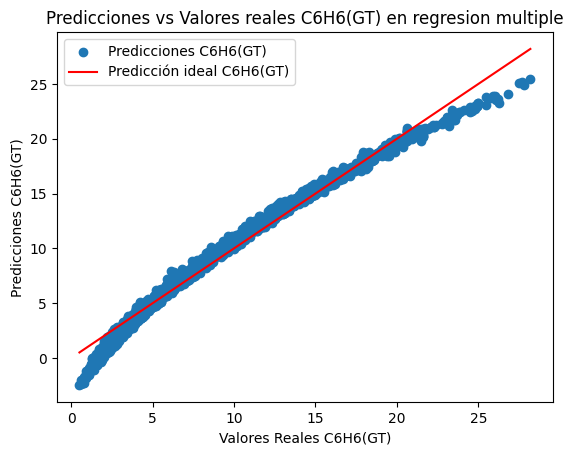

In [61]:
#Mostramos la gráfica de las predicciones respecto a los valores reales para la regresion multiple
plt.scatter(y_test_m, predicciones_reg_multiple, label="Predicciones C6H6(GT)")
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], color='red', label="Predicción ideal C6H6(GT)")
plt.title("Predicciones vs Valores reales C6H6(GT) en regresion multiple")
plt.xlabel('Valores Reales C6H6(GT)')
plt.ylabel('Predicciones C6H6(GT)')
plt.legend()

In [62]:
#Comprobaciones de que NO hay overfitting

# Predicciones en el conjunto de entrenamiento
predicciones_train_multiple = lm_multiple.predict(X_train_m)

print("Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal multiple para el conjunto de Train: \n")
calculo_metricas(y_train_m, predicciones_train_multiple, "Train regresión lineal multiple")


Calculo de las diferentes metricas para poder evaluar el modelo de regresión lineal multiple para el conjunto de Train: 

MSE ( Train regresión lineal multiple ):  0.6905095335989262
RMSE( Train regresión lineal multiple ):  0.830969032876031
MAE( Train regresión lineal multiple ):  0.6370352440147283
R²( Train regresión lineal multiple ):  0.9803906644730143
RMLSE( Train regresión lineal multiple ):  0.04158763914002735
MAPE( Train regresión lineal multiple ):  14.41774090457231 %
MPE( Train regresión lineal multiple ):  6.695718088752272 %


#### ¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

El modelo de **regresión lineal múltiple** presenta un rendimiento superior en comparación con el modelo de regresión lineal simple al analizar las métricas. En primer lugar, el `error cuadrático medio (MSE)` y `su raíz (RMSE)` son más bajos en el modelo múltiple (0.6742 y 0.8211, respectivamente) que en el modelo simple (0.8077 y 0.8987), lo que indica que, en promedio, las predicciones están más cerca de los valores reales. De manera similar, el `error absoluto medio (MAE)` refleja una menor desviación en las predicciones en el modelo múltiple (0.6384) frente al modelo simple (0.7125). Además, tanto el `error porcentual absoluto medio (MAPE)` (16.38% frente a 18.83%) como el `error porcentual medio (MPE)` (9.10% frente a 10.78%) muestran una reducción significativa en la desviación porcentual respecto a los valores reales, aunque sigue tendiendo pero de menor manera a sobreestimar los datos. Finalmente, `el coeficiente de determinación (R²)` en la regresión múltiple es ligeramente superior (0.9794 frente a 0.9754), lo que significa que el modelo múltiple logra explicar un mayor porcentaje de la variabilidad de la variable objetivo.

Aunque en el **modelo de regresión simple** se utilizó la variable `PT08.S2(NMHC)` *con una correlación muy alta (0.988) con la variable objetivo C6H6(GT)* y un *coeficiente de 5.86* al hacer la regresión, el modelo múltiple demuestra que la incorporación de otras variables relevantes aporta información adicional que permite refinar aún más las predicciones. En términos prácticos, el error absoluto medio (MAE) del modelo múltiple es de 0.6384, y el error porcentual medio (MAPE) es de 16.38%, lo que sugiere que, en promedio, las predicciones se desvían en un 16.38% de los valores reales, una mejora significativa respecto al modelo simple.

En conclusión, el modelo de regresión lineal múltiple no solo reduce los errores en las predicciones, sino que también ofrece una mayor capacidad explicativa y de precisión, sin embargo, como ya se ha comentado, sigue sobrestimando, aunque de menor manera los datos, teniendo unas predicciones un poco más altas de los valores reales. A pesar de que la variable utilizada en la regresión simple era muy fuerte por sí misma, el análisis confirma que el modelo múltiple logra un ajuste más robusto y eficiente, convirtiéndolo por tanto en una opción mejor. Además, al comparar el rendimiento en los conjuntos de entrenamiento (Train) y prueba (Test) para el modelo de regresión lineal múltiple, se observa que las métricas son consistentes y bastante similares, con un desempeño ligeramente mejor en el conjunto de prueba en algunos términos. Estas pequeñas diferencias indican que el modelo **no presenta overfitting**, sino que generaliza correctamente, manteniendo un equilibrio sólido entre el ajuste a los datos de entrenamiento y su capacidad para predecir con precisión en datos no vistos. En definitiva, el modelo está funcionando de manera óptima, lo que refuerza su fiabilidad y robustez.

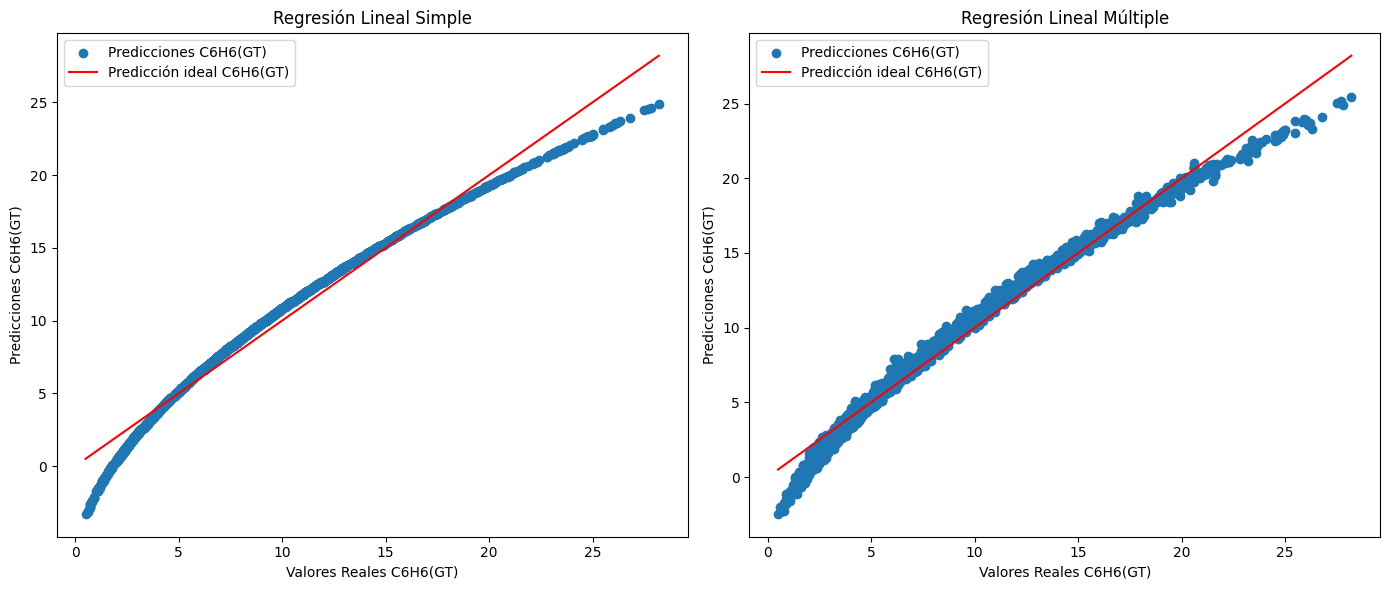

In [63]:
# Mostramos las predicciones de ambos modelos de nuevo en una misma gráfica para su mejor comparativa
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de Regresión Lineal Simple
axs[0].scatter(y_test, predicciones, label="Predicciones C6H6(GT)")
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Predicción ideal C6H6(GT)")
axs[0].set_title("Regresión Lineal Simple")
axs[0].set_xlabel('Valores Reales C6H6(GT)')
axs[0].set_ylabel('Predicciones C6H6(GT)')
axs[0].legend()

# Gráfica de Regresión Lineal Múltiple
axs[1].scatter(y_test_m, predicciones_reg_multiple, label="Predicciones C6H6(GT)")
axs[1].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], color='red', label="Predicción ideal C6H6(GT)")
axs[1].set_title("Regresión Lineal Múltiple")
axs[1].set_xlabel('Valores Reales C6H6(GT)')
axs[1].set_ylabel('Predicciones C6H6(GT)')
axs[1].legend()

# Ajustamos el diseño para evitar que se solape
plt.tight_layout()
plt.show()

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

La explicación de los parámetros es la siguiente:

- **criterion**: Este hiperparámetro define la función que se utiliza para *medir la calidad de una división* (split) en el árbol de decisión. Además, posee una serie de opciones disponibles:
    - *squared_error*: Minimiza el error cuadrático medio (MSE) y busca reducir la varianza entre los nodos hijos.
    - *friedman_mse*: Variante del error cuadrático medio que optimiza los splits usando la puntuación de mejora de Friedman.
    - *absolute_error*: Minimiza el error absoluto medio (MAE) utilizando la mediana de cada nodo como predicción.
    - *poisson*: Utiliza la reducción de la desviación media de Poisson para dividir los nodos.

- **splitter**: Define la estrategia utilizada para *elegir las divisiones* (splits) en cada nodo del árbol. Además, posee una serie de opciones disponibles:
    - *best*: Selecciona la mejor división posible en cada nodo, optimizando el criterio definido.
    - *random*: Selecciona una división aleatoria entre las mejores opciones disponibles.

- **max_depth**: Representa la *profundidad máxima que puede alcanzar el árbol de decisión*. Un valor bajo evitará que el modelo sea demasiado complejo, reduciendo el riesgo de overfitting. Si se deja como None, el árbol crecerá hasta que todos los nodos hoja sean puros o tengan menos muestras que min_samples_split.

- **min_samples_split**: Es el *número mínimo de muestras requeridas para dividir un nodo interno*. Un valor alto puede prevenir que el modelo sufra sobreajuste.

- **min_samples_leaf**: Es el *número mínimo de muestras que debe tener un nodo hoja*. Valores más altos ayudan a suavizar el modelo y evitar que el árbol aprenda ruido de los datos.

- **max_features**: Define el *número máximo de características (features) a considerar al buscar el mejor split en cada nodo*. Además, posee una serie de opciones disponibles: *int* (número exacto de características a considerar), *float* (fracción de características a considerar), *sqrt* (raíz cuadrada del número total de características), *log2* (logaritmo en base 2 del número total de características), *None* (se consideran todas las características).

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Establece el valor *mínimo de reducción en la impureza necesario para realizar una división (split) en un nodo*. Si la reducción de impureza calculada no alcanza el valor definido por *min_impurity_decrease*, el nodo no se dividirá. Por lo tanto, *min_impurity_decrease* es un parámetro clave para controlar la profundidad y complejidad del árbol de decisión, ayudando a evitar tanto el **overfitting** como el **underfitting**.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [64]:
from sklearn.tree import DecisionTreeRegressor

# Definmos el modelo regresor del arbol de decisión con los hiperparámetros especificados
decision_tree_regressor = DecisionTreeRegressor(
    criterion="poisson",  # Criterio para particiones
    max_depth=10,         # Profundidad máxima
    min_samples_split=10, # Mínimo número de ejemplos para realizar una partición
    min_samples_leaf=2,   # Mínimo número de ejemplos para que sea una hoja
    max_features=None,    # Usar todas las características
    random_state=42       # Semilla para reproducibilidad
    )

# Entrenamiento del modelo
decision_tree_regressor.fit(X_train_m, y_train_m)

# Realizamos las predicciones para el conjunto de datos de Test
predicciones_decision_tree = decision_tree_regressor.predict(X_test_m)

#### Calcula MAE, R2 y RMSLE

In [65]:
#Calculo de las métricas de evaluación para el modelo de arboles de decisión
print("Calculo de las diferentes metricas para poder evaluar el modelo de arboles de decision para el conjunto de Test: \n")
calculo_metricas(y_test_m, predicciones_decision_tree, "Test arboles de decision")

Calculo de las diferentes metricas para poder evaluar el modelo de arboles de decision para el conjunto de Test: 

MSE ( Test arboles de decision ):  0.02986316343116905
RMSE( Test arboles de decision ):  0.17280961614206847
MAE( Test arboles de decision ):  0.1307870061777772
R²( Test arboles de decision ):  0.9990896587861411
RMLSE( Test arboles de decision ):  0.009292733979484042
MAPE( Test arboles de decision ):  2.199881724030015 %
MPE( Test arboles de decision ):  1.3743612551936224 %


#### ¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [66]:
#Comprobaciones de que NO hay overfitting esta vez utilizando cross-validation para utilizar otra forma de comparar si hay overfitting
from sklearn.model_selection import cross_val_predict

cv_predictions = cross_val_predict(decision_tree_regressor, X_train_m, y_train_m, cv=10)

print("\nCalculo de las diferentes metricas para poder evaluar el modelo de arboles de decision para el conjunto de Train con cross-validation: \n")
calculo_metricas(y_train_m, cv_predictions, "Train arboles de decision CV")



Calculo de las diferentes metricas para poder evaluar el modelo de arboles de decision para el conjunto de Train con cross-validation: 

MSE ( Train arboles de decision CV ):  0.0007205392335197277
RMSE( Train arboles de decision CV ):  0.026842861872753577
MAE( Train arboles de decision CV ):  0.009112881840096603
R²( Train arboles de decision CV ):  0.9999795378703654
RMLSE( Train arboles de decision CV ):  4.13426667348151e-05
MAPE( Train arboles de decision CV ):  0.13103001731242883 %
MPE( Train arboles de decision CV ):  0.00231920871066022 %


_indica aquí tu respuesta_

En este caso, al contrario de los dos casos anteriores de regresión, se ha utilizado **cross-validation** o también denominada **validación cruzada**. Es un buen método para comprobar como se ajusta el modelo a los datos de entrenamiento, proporcionando a su vez una evaluación más robusta de su capacidad de generalización. A la hora de realizar este proceso, los datos se dividen en subconjuntos o folds (cogiendo en este caso 10). Por tanto, el modelo se entrenará y evaluará en diferentes combinaciones de estos subconjuntos, que permiten obtener un rendimiento más fiable que si se entrenara con una única división de los datos. Este proceso ayuda a entender como el modelo se adapta a los diferentes fragmentos de los datos, lo cual ayuda a conocer si se está aprendiendo patrones generales o si está ajustándose demasiado a los detalles específicos del conjunto de entrenamiento (overfitting).

Una vez obtenidas las métricas de validación cruzada, las cuales reflejan el rendimiento obtenido por parte de los datos de entrenamiento, se comparan con las métricas obtenidas al evaluar el modelo en el conjunto de prueba (conjunto de Test que el modelo no ha visto durante el entrenamiento). Por tanto, gracias a esta comparativa se puede determinar si hay overfitting:

- En el caso de el *rendimiento obtenido en la validación cruzada sea significativamente mejor que la del conjunto de prueba*, esto indicará que el modelo se ha aprendido de forma muy exhaustiva los patrones específicos de los datos de entrenamiento y no es capaz de generalizar datos nuevos, lo cual sería un claro indicativo de overfitting.

- En el otro caso, *si ambas métricas calculadas son similares*, entonces el modelo no estará sobreajustado y por tanto habrá ganado una buena capacidad de generalización.

En resumen, la validación cruzada ayuda a evaluar si el modelo se ajusta de manera adecuada a los datos de entrenamiento y permite comparar su rendimiento en datos no vistos (los de prueba), proporcionando un análisis más completo de su capacidad para generalizar y evitando conclusiones erróneas por basarse solo en el rendimiento en los datos de entrenamiento.

En este caso concreto, al realizar la validación cruzada, se observa que, aunque las métricas obtenidas en el conjunto de entrenamiento (CV) son ligeramente mejores que las métricas del conjunto de prueba (Test), las diferencias entre ambas son mínimas. Por ejemplo, el R² obtenido en la validación cruzada es de 0.99998, mientras que en el conjunto de prueba es de 0.99909, lo que representa una diferencia insignificante y sugiere que el modelo mantiene una excelente capacidad explicativa en ambos escenarios. Asimismo, el MSE es de 0.00072 en la validación cruzada frente a 0.02986 en el conjunto de prueba, y el MAE es de 0.0091 en CV frente a 0.1308 en Test, aunque hay un pequeño aumento en los errores en el conjunto de prueba, estos valores siguen siendo muy bajos, lo que indica que el modelo generaliza correctamente. En cuanto a las métricas porcentuales, el MAPE es de 0.1310 % en la validación cruzada frente a 2.1999 % en el conjunto de prueba, aunque hay un incremento en el error porcentual medio absoluto, ambos valores son bajos y reflejan una desviación mínima en las predicciones respecto a los valores reales. Por otra parte, el MPE pasa de 0.0023 % en validación cruzada a 1.3744 % en el conjunto de prueba, aunque el valor en el conjunto de prueba es algo mayor, sigue siendo lo suficientemente bajo como para no considerarse un indicio de sobreajuste.

Si la diferencia entre las métricas hubiera sido más significativa, especialmente en valores clave como el R² o el MSE, podría haberse interpretado como un signo de overfitting, sugiriendo que el modelo habría memorizado los datos de entrenamiento en lugar de aprender patrones generalizables. Sin embargo, en este caso, las diferencias son pequeñas y esperables, lo que indica que el modelo mantiene un equilibrio sólido entre el ajuste a los datos de entrenamiento y su capacidad para predecir correctamente en datos no vistos. En conclusión, los resultados sugieren que el modelo de árboles de decisión no presenta overfitting, ya que logra un rendimiento consistente tanto en la validación cruzada como en el conjunto de prueba, reforzando así su capacidad de generalización y fiabilidad.

#### ¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

In [70]:
print("Calculo de las diferentes metricas para poder evaluar el modelo de regresion lineal simple para el conjunto de Test: \n")
calculo_metricas(y_test, predicciones, "Test regresion lineal simple")

print("\nCalculo de las diferentes metricas para poder evaluar el modelo de regresion lineal multiple para el conjunto de Test: \n")
calculo_metricas(y_test_m, predicciones_reg_multiple, "Test regresion lineal multiple")

print("\nCalculo de las diferentes metricas para poder evaluar el modelo de arboles de decision para el conjunto de Test: \n")
calculo_metricas(y_test_m, predicciones_decision_tree, "Test arboles de decision")

Calculo de las diferentes metricas para poder evaluar el modelo de regresion lineal simple para el conjunto de Test: 

MSE ( Test regresion lineal simple ):  0.8076986698019254
RMSE( Test regresion lineal simple ):  0.898720573816982
MAE( Test regresion lineal simple ):  0.7125248854554282
R²( Test regresion lineal simple ):  0.9753783155225848
RMLSE( Test regresion lineal simple ):  0.056231954867063935
MAPE( Test regresion lineal simple ):  18.83335376699401 %
MPE( Test regresion lineal simple ):  10.784017380299838 %

Calculo de las diferentes metricas para poder evaluar el modelo de regresion lineal multiple para el conjunto de Test: 

MSE ( Test regresion lineal multiple ):  0.6742225851504237
RMSE( Test regresion lineal multiple ):  0.8211105803425162
MAE( Test regresion lineal multiple ):  0.6383504143554279
R²( Test regresion lineal multiple ):  0.9794471671431724
RMLSE( Test regresion lineal multiple ):  0.053920971852791114
MAPE( Test regresion lineal multiple ):  16.37752493

_indica aquí tu respuesta_

En los casos anteriores, se ha podido demostrar que el modelo de regresión lineal múltiple supera al de regresión lineal simple debido a que considera un mayor número de variables predictoras (variables independientes), lo que le permite construir un modelo más robusto y preciso.

En este caso si comparamos las métricas obtenidas por ambos modelos (regresión lineal múltiple y el modelo de regresión por árboles de decisión), se puede observar como el coeficiente de determinación R² del modelo de árboles de decisión es 0.99908, lo que significa que el modelo ha explicado casi toda la variabilidad de la variable objetivo. En cambio, el modelo de regresión lineal múltiple, con un R² de 0.9794, ha explicado un porcentaje significativamente menor, lo que implica que el modelo de árboles de decisión ha logrado capturar de manera más precisa la relación entre las características y la variable objetivo.

Por otro lado, en las métricas de error, el modelo de árboles de decisión también ha demostrado un desempeño superior. Su MSE (error cuadrático medio) es de 0.02986, lo que indica que las predicciones están, en promedio, mucho más cerca de los valores reales en comparación con el modelo de regresión lineal múltiple, que tiene un MSE considerablemente más alto (0.6742). Además, el modelo de árboles de decisión presenta un RMSE de 0.1728, lo que refleja que el error típico de las predicciones es considerablemente pequeño. Por otro lado, el MAE (error absoluto medio) del modelo de árboles de decisión es 0.130787, lo que también muestra que este modelo hace predicciones mucho más precisas en comparación con el de regresión lineal múltiple, que tiene un MAE de 0.63835. Al comparar el RMSLE de ambos modelos, el modelo de árboles de decisión tiene un RMSLE de 0.0092927, que es mucho más bajo que el de la regresión lineal múltiple (0.0539).

Asimismo, al observar las métricas porcentuales, el modelo de regresión lineal múltiple presenta un MAPE de 16.38% y un MPE de 9.10%, lo que indica que, en promedio, las predicciones se desvían en un 16.38% de los valores reales y tienden a sobrestimar ligeramente los resultados. Por su parte, el modelo de árboles de decisión presenta valores notablemente más bajos, con un MAPE de 2.20% y un MPE de 1.37%, lo que refuerza su capacidad para generar predicciones mucho más precisas y ajustadas a los valores reales.

Para concluir, ambos modelos ofrecen un buen rendimiento, el modelo de regresión con árboles de decisión ha mostrado mejoras significativas en todas las métricas clave, lo que indica en este caso ser más efectivo a la hora de capturar la relación entre las características y la variable objetivo.


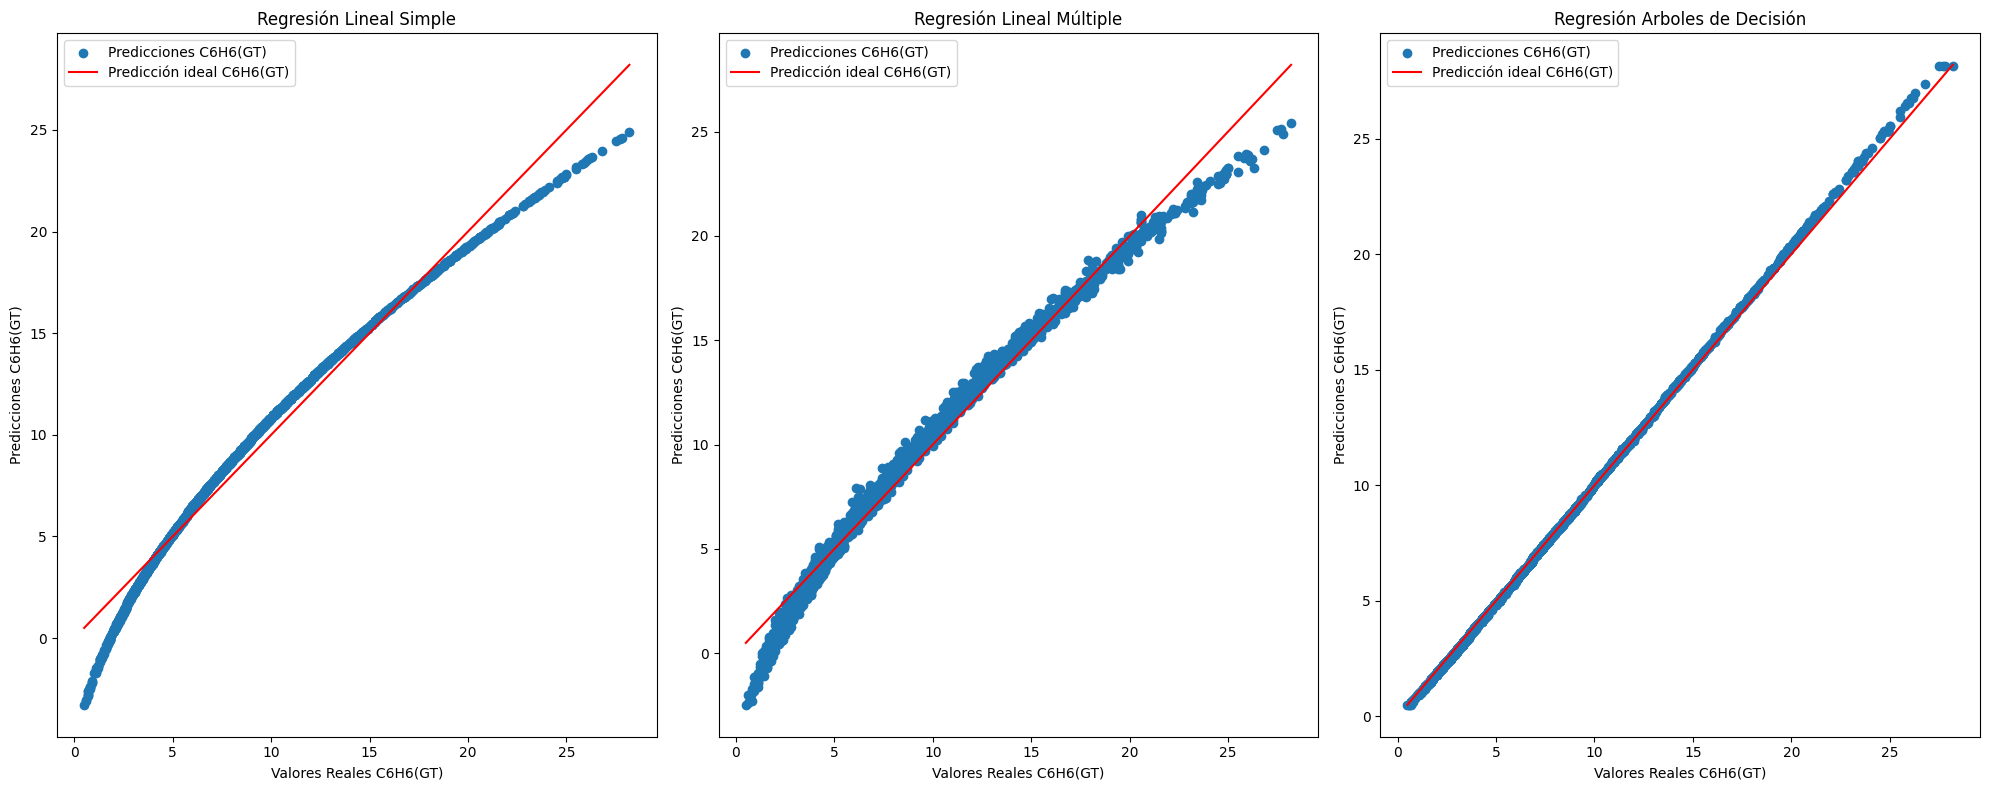

In [76]:
# Mostramos las predicciones de ambos modelos de nuevo en una misma gráfica para su mejor comparativa
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Gráfica de Regresión Lineal Simple
axs[0].scatter(y_test, predicciones, label="Predicciones C6H6(GT)")
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Predicción ideal C6H6(GT)")
axs[0].set_title("Regresión Lineal Simple")
axs[0].set_xlabel('Valores Reales C6H6(GT)')
axs[0].set_ylabel('Predicciones C6H6(GT)')
axs[0].legend()

# Gráfica de Regresión Lineal Múltiple
axs[1].scatter(y_test_m, predicciones_reg_multiple, label="Predicciones C6H6(GT)")
axs[1].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], color='red', label="Predicción ideal C6H6(GT)")
axs[1].set_title("Regresión Lineal Múltiple")
axs[1].set_xlabel('Valores Reales C6H6(GT)')
axs[1].set_ylabel('Predicciones C6H6(GT)')
axs[1].legend()

# Gráfica de Regresión Lineal Múltiple
axs[2].scatter(y_test_m, predicciones_decision_tree, label="Predicciones C6H6(GT)")
axs[2].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], color='red', label="Predicción ideal C6H6(GT)")
axs[2].set_title("Regresión Arboles de Decisión")
axs[2].set_xlabel('Valores Reales C6H6(GT)')
axs[2].set_ylabel('Predicciones C6H6(GT)')
axs[2].legend()

# Ajustamos el diseño para evitar que se solape
plt.tight_layout()
plt.show()

#### **Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

_indica_aquí_tu_respuesta_

En función al EDA realizado, las decisiones tomadas sobre los datos e hiperparámetros y considerando las características computacionales del equipo, se ha podido comprobar como el rendimiento de los modelos de regresión varían según el enfoque que se le aplique y las diferentes métricas que se consideren aplicar.

- **Regresión Lineal Simple**:
    Este modelo ha mostrado ser útil gracias a su buen desempeño básico en la predicción de la variable objetivo. Sin embargo ha tenido una menor capacidad de capturar las relaciones entre la variable elegida para hacer la predicción y la variable objetivo en comparación con los otros dos modelos estudiados. También cabe destacar que los valores obtenidos por sus métricas en el conjunto de Test fueron peores que las obtenidas en los modelos más complejos. Destacando el valor de R² obtenido, siendo el más bajo de los tres modelos estudiados, indicando que este modelo explica la cantidad de variabilidad de forma más limitada.

- **Regresión Lineal Multiple**:
    Este modelo ha superado al modelo de regresión lineal simple al consideras múltiples variables predictoras en lugar de una sola. Al introducir más características al modelo, este ha conseguido mejorar su capacidad de predicción en cuanto a la variable objetivo. Las métricas obtenidas para este modelo han sido mejores que para el modelo anterior, indicando así que las predicciones se han encontrado más cerca de los valores reales.

- **Árboles de Decisión**:
    Este modelo ha tenido un rendimiento significativamente mejor al de regresión lineal múltiple. Al ser un modelo no lineal ha mostrado una mayor capacidad para capturar las relaciones complejas entre las distintas variables. En general, las métricas obtenidas para este modelo han mostrado tener mejores resultados, además en el caso del R² ha obtenido el valor más cercano a uno, explicando por tanto la variabilidad de los datos prácticamente casi a la perfección.

En resumen, el modelo de regresión de árboles de decisión ha sido el modelo que mejores resultados ha obtenido, gracias a su capacidad de captar las relaciones no lineales y su flexibilidad frente a los diferente tipos de datos. Aunque la regresión lineal múltiple también ha obtenido buenos resultados, las métricas han demostrado como los árboles de decisión para estos datos han tenido un mejor y mayor rendimiento.


## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

Salazar Torres, J. I., & Girón Cardenas, E. (2021). Análisis y aplicación de algoritmos de minería de datos. Perspectivas, 6(21), 71–88. https://doi.org/10.26620/uniminuto.perspectivas.6.21.2021.71-88 (Original work published 3 de marzo de 2021)

- **título**: Análisis y aplicación de algoritmos de minería de datos
- **autores**: Salazar Torres, James Ir y Edison Girón Cardenas
- **revista**: Revistas Académicas de la Corporación Universitaria Minuto de Dios (Revista Uniminuto). Revistas especializadas o de divulgación científica, apoyando el desarrollo académico y la producción investigativa.
- **año de publicación**: 2021

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

El objetivo de la investigación fue analizar y aplicar algoritmos de minería de datos para identificar patrones, relaciones y factores relevantes dentro de un conjunto de datos, facilitando así la interpretación de la información y la toma de decisiones basadas en evidencia. En este estudio se utilizaron principalmente dos técnicas, sin que se indicara ninguna adaptación especial de los algoritmos. Se acabo utilizando un conjunto de datos de prueba sobre un análisis químico en los vinos para poder probar las diferentes técnicas que aborda el artículo:

- **Árboles de Decisión**: Se emplearon para identificar patrones significativos y determinar las variables más relevantes que influyen en los resultados obtenidos.

- **Regresión Lineal Múltiple**: Se utilizó para modelar la relación entre las variables independientes y la variable objetivo, permitiendo realizar predicciones precisas y analizar el impacto de cada variable en los resultados finales.

Además de las dos técnicas vistas a lo largo de la actividad (árboles de decisión y regresión lineal múltiple), también se utilizaron otras técnicas como *tablas de decisión* y el *algorítmo M5*. 

En conclusión, los principales resultados de la investigación y las métricas hayadas en las misma, muestran que ambas técnicas permiten detectar patrones importantes, realizar predicciones confiables y obtener una interpretación clara de los datos analizados. Además, se evidencia que estas metodologías son efectivas para comprender la relación entre las variables y extraer información valiosa para respaldar decisiones estratégicas.